# Series and DataFrames

The pandas library has two primary containers of data, the `DataFrame` and the `Series`. You will spend nearly all your time working with both of the objects when you use pandas.

![](../images/01_dataframe_anatomy.png)

At first glance, the DataFrame looks like any other two-dimensional table of data that you have seen. It has rows and it has columns. Technically, there are three main components of the DataFrame.

## DataFrame Components

A DataFrame is composed of three different components, the `index`, `columns`, and the `data`;  that you must be aware of in order to maximize the DataFrame's full potential.. The data is also known as the `values`.

## Labels

The main takeaway from the DataFrame anatomy is that each row has a label and each column has a label. These labels are used to refer to specific rows or columns in the DataFrame.

The Index component of the `Series` and `DataFrame` is what separates pandas from most other data analysis libraries and is the key to understanding how many operations work.

In [5]:
import pandas as pd
import numpy as np

In [4]:
!pip install pandas


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\Swapnil\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [38]:
movie = pd.read_csv('../data/movie.csv')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### Row labels/index

Row labels or also known as index tells the position of the row.

In [39]:
index = movie.index
index

RangeIndex(start=0, stop=4916, step=1)

### Column labels

Column labels tells the position of the column

In [40]:
columns = movie.columns
columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

### Values

Values are the actual data from the dataframe which can be accessed using row and column labels.

In [41]:
values = movie.values
values

array([['Color', 'James Cameron', 723.0, ..., 7.9, 1.78, 33000],
       ['Color', 'Gore Verbinski', 302.0, ..., 7.1, 2.35, 0],
       ['Color', 'Sam Mendes', 602.0, ..., 6.8, 2.35, 85000],
       ...,
       ['Color', 'Benjamin Roberds', 13.0, ..., 6.3, nan, 16],
       ['Color', 'Daniel Hsia', 14.0, ..., 6.3, 2.35, 660],
       ['Color', 'Jon Gunn', 43.0, ..., 6.6, 1.85, 456]], dtype=object)

If you remember we said that Pandas uses Numpy under the hood let's see how is it so.
The data types of row labels, column labels you might notice the parent data type as `pandas.core.indexes...`

In [42]:
print(type(index))
print(type(columns))
print(type(values))

<class 'pandas.core.indexes.range.RangeIndex'>
<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>


But when you just use `.values` you get numpy array as data type. Which shows that `pandas` uses `numpy`.

In [43]:
print(type(index.values))
print(type(columns.values))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


```{note}

The `head` method accepts a single parameter, n, which controls the number of rows displayed. Similarly, the `tail` method returns the last n rows.
```

## Dtypes

Display the data type of each column in a DataFrame. It is crucial to know the type of data held in each column as it fundamentally changes the kind of operations that are possible with it. There are mostly **three** major `dtypes` in Dataframe **1. int64 , 2.float64 and 3. object**  

First 2 are normal numerical values and number **64** tells us about number of bits your system takes to store `int` or `float`.
The last one is `object`, if certain column has `object` dtype that means it has following two cases:

1. It has mixed values(`int`,`float` and `str`)
2. All string values.

In [44]:
movie.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [45]:
movie.get_dtype_counts() ## method, not attribute

float64    13
int64       3
object     12
dtype: int64

## Series Methods

Series methods are the primary way to use the abilities that the Series offer. We will learn quiet a few series methods now.

```{tip} 

You are not suppose to understand everything in the first go. Just focus on understanding what all you can do with pandas Series and DataFrames. You can always come back and look at the syntax (we still do, even after using pandas for more than 3 years). 
```

In [46]:
director = movie.director_name
director.head()

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4          Doug Walker
Name: director_name, dtype: object

### `value_counts()` method
`value_counts()` method when applied on a series it returns **count of each unique value** in the series.

In [47]:
director.value_counts().head()

Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        16
Name: director_name, dtype: int64

Counting the number of elements in the Series may be done with the `size` or `shape` parameter or the `len` function

In [48]:
director.size, director.shape, len(director)

(4916, (4916,), 4916)

`count()` method returns number of *not-null* values (not same as `size` or `len()`).

### `count()` method

In [49]:
director.count()

4814

Since the `count()` method returned a value less than the total number of Series elements, we know that there are missing values. The `isnull()` method may be used to determine whether each individual value is missing or not. The result will be a Series of booleans the same length as the original Series. Then we can call `sum()` methods to get number of *True* values i.e. number of missing values.

In [50]:
director.isnull().sum()

102

In [51]:
director.size - director.isnull().sum() ## same as count method

4814

```{note}
There exists a complement of `isnull()`: the `notnull()` method, which returns *True* for all the non-missing values.
```

Selecting *actor_1_facebook_likes* column 

In [52]:
actor_1_fb_likes = movie['actor_1_facebook_likes']
actor_1_fb_likes.head()

0     1000.0
1    40000.0
2    11000.0
3    27000.0
4      131.0
Name: actor_1_facebook_likes, dtype: float64

### Mathematical Methods

Basic summary statistics may be yielded with the `min()`, `max()`, `mean()`, `median()`, `std()` and `sum()` methods

In [53]:
actor_1_fb_likes.min(), \
actor_1_fb_likes.max(), \
actor_1_fb_likes.mean(), \
actor_1_fb_likes.median(), \
actor_1_fb_likes.std(), \
actor_1_fb_likes.sum()

(0.0, 640000.0, 6494.488490527602, 982.0, 15106.986883848309, 31881444.0)

 you may use the `describe()` method to return both the summary statistics and a few of the quantiles at once

In [54]:
actor_1_fb_likes.describe()

count      4909.000000
mean       6494.488491
std       15106.986884
min           0.000000
25%         607.000000
50%         982.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [55]:
actor_1_fb_likes.quantile(0.5)

982.0

 To know more about percentile and quantile watch this video.


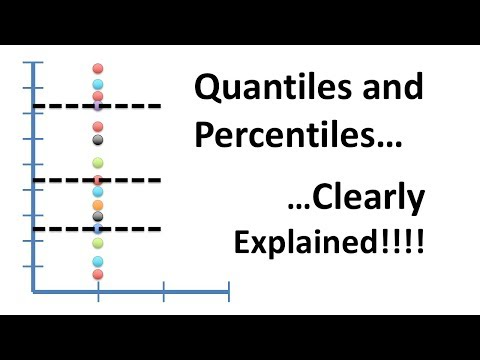

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('IFKQLDmRK0Y')

In [56]:
actor_1_fb_likes.quantile([0.2,0.5,0.7])

0.2     510.0
0.5     982.0
0.7    8000.0
Name: actor_1_facebook_likes, dtype: float64

### Missing values

In [57]:
actor_1_fb_likes.count(), actor_1_fb_likes.size

(4909, 4916)

`count()` is less than the `size` of the series. So we know that we have some missing values.

#### `fillna()` method

It is possible to **replace** all missing values within a Series with the `fillna()` method.

In [58]:
actor_1_fb_likes_filled = actor_1_fb_likes.fillna(0)
actor_1_fb_likes_filled.count()

4916

#### `dropna()` method
To **remove** the missing values (instead of replacing), use `dropna()` method.

In [59]:
actor_1_fb_likes_dropped = actor_1_fb_likes.dropna()
actor_1_fb_likes_dropped.count()

4909

we determined that there were missing values in the Series by observing that the result from the count method did not match the size attribute. A more direct approach is to use the `hasnans` attribute:

In [60]:
director.hasnans

True

In [61]:
actor_1_fb_likes.hasnans

True

In [62]:
actor_1_fb_likes_filled.hasnans

False

### Operators

All the operators used, apply the same operation to each element in the Series. In native Python, this would require a *for-loop* to iterate through each of the items in the sequence before applying the operation. Pandas relies heavily on the NumPy library, which allows for vectorized computations, or the ability to operate on entire sequences of data without the explicit writing of *for-loop*. Each operation returns a Series with the same index, but with values that have been modified by the operator.

```{note} 
The output can be quite big, hence we will be using `head()` method everywhere. If you want to see the complete output, you can simpily remove the `head()` method and run the cell again.
```

Selecting 'imdb_score' column

In [63]:
imdb_score = movie['imdb_score']
imdb_score.head()

0    7.9
1    7.1
2    6.8
3    8.5
4    7.1
Name: imdb_score, dtype: float64

#### Arithmatical operators

In [64]:
imdb_score.head() +1 # +,-,*,/,//,%,** all these operators are allowed. 

0    8.9
1    8.1
2    7.8
3    9.5
4    8.1
Name: imdb_score, dtype: float64

#### Comparison operators

In [65]:
imdb_score.head() > 7 # comparision operators are also allowed. They return boolean series.

0     True
1     True
2    False
3     True
4     True
Name: imdb_score, dtype: bool

In [66]:
director.head() == 'James Cameron'

0     True
1    False
2    False
3    False
4    False
Name: director_name, dtype: bool

### Chaining methods

In Python, every variable is an object, and all objects have attributes and methods that refer to or return more objects. The sequential invocation of methods using the dot notation is referred to as method chaining. Pandas is a library that lends itself well to **method chaining**, as many Series and DataFrame methods return more Series and DataFrames, upon which more methods can be called.

 It is not necessary for the method to return the same type of object. 

In [67]:
director.value_counts().sum()

4814

In [68]:
actor_1_fb_likes.isnull().sum() 

7

Instead of summing up the booleans to find the total number of missing values, we can take the **mean** of the Series to get the percentage of values that are missing.

In [69]:
actor_1_fb_likes.isnull().mean()

0.0014239218877135883

### Dtypes & more

All the non-missing values of *actor_1_fb_likes* should be integers as it is impossible to have a partial Facebook like. Any numeric columns with **missing values** have their data type as `float`. 

In [70]:
actor_1_fb_likes.dtype

dtype('float64')

We cannot convert *actor_1_fb_likes* to integers because **missing values** are stored as floats.

In [71]:
actor_1_fb_likes.astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

Carefully read the error msg!

If we fill the **missing values** in *actor_1_fb_likes* with zeros, we can then convert it into integer with the `astype()` method.

In [72]:
actor_1_fb_likes.fillna(0).astype(int).head()

0     1000
1    40000
2    11000
3    27000
4      131
Name: actor_1_facebook_likes, dtype: int64

## DataFrames

Now we will cover some of the fundamental operation of DataFrames. Many of them are very much similar to that of series operations.

### Selecting Multiple columns

Selecting a single column is accomplished by passing the desired column name as a string to the indexing operator of a DataFrame. It is often necessary to focus on a subset of the current working dataset, which is accomplished by selecting multiple columns. To selected multiple columns, pass in a list of column names to the indexing operator.

The DataFrame indexing operator is very flexible and capable of accepting a number of different objects. If a string is passed, it will return a single-dimensional Series. If a list is passed to the indexing operator, it returns a DataFrame of all the columns in the list in the specified order. We will talk more about subsetting & indexing in the next chapter.

In [73]:
movie_actor_director = movie[['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name']]
movie_actor_director.head()

,actor_1_name,actor_2_name,actor_3_name,director_name
0,CCH Pounder,Joel David Moore,Wes Studi,James Cameron
1,Johnny Depp,Orlando Bloom,Jack Davenport,Gore Verbinski
2,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Sam Mendes
3,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Christopher Nolan
4,Doug Walker,Rob Walker,NaN,Doug Walker


### Selecting columns with methods

Although column selection is usually done directly with the indexing operator, there are some DataFrame methods that facilitate their selection in an alternative manner. `select_dtypes()` and `filter()` are two useful methods to do this.

We would highly encourage your to check the official docs for more detail.

`filter()` method is flexible and searches column names (or index labels) based on which parameter is used. The `filter()` method also allows columns to be searched through **regular expressions** with the *regex* parameter. To know more about regex [visit this website](https://regexone.com/)

### Attributes and methods

A variety of methods which operated on a single column or Series of data. When are called from a DataFrame, they perform that operation for each column at once.


In [74]:
movie.shape # returns a two element tuple of the number of rows and columns

(4916, 28)

In [75]:
len(movie) # return the number of rows

4916

In [76]:
movie.ndim # returns the number of dimensions

2

In [77]:
movie.size # returns the total number of elements in the DataFrame

137648

In [78]:
movie.count() # returns the number of non-missing values for each column

color                        4897
director_name                4814
num_critic_for_reviews       4867
duration                     4901
director_facebook_likes      4814
actor_3_facebook_likes       4893
actor_2_name                 4903
actor_1_facebook_likes       4909
gross                        4054
genres                       4916
actor_1_name                 4909
movie_title                  4916
num_voted_users              4916
cast_total_facebook_likes    4916
actor_3_name                 4893
facenumber_in_poster         4903
plot_keywords                4764
movie_imdb_link              4916
num_user_for_reviews         4895
language                     4904
country                      4911
content_rating               4616
budget                       4432
title_year                   4810
actor_2_facebook_likes       4903
imdb_score                   4916
aspect_ratio                 4590
movie_facebook_likes         4916
dtype: int64

In [79]:
movie.min() # min, max, std, mean, median, etc can be used to compute summary statstics

num_critic_for_reviews          1.00
duration                        7.00
director_facebook_likes         0.00
actor_3_facebook_likes          0.00
actor_1_facebook_likes          0.00
gross                         162.00
num_voted_users                 5.00
cast_total_facebook_likes       0.00
facenumber_in_poster            0.00
num_user_for_reviews            1.00
budget                        218.00
title_year                   1916.00
actor_2_facebook_likes          0.00
imdb_score                      1.60
aspect_ratio                    1.18
movie_facebook_likes            0.00
dtype: float64

If you look closely, you will notice that the output from `min()` is missing all the object columns from `count()`. The reason for this is that there are missing values in the object columns and pandas does not know how to compare a string value with a missing value. It silently drops all of the columns for which it is unable to compute a minimum.

The `describe()` method is very powerful and calculates all the descriptive statistics and quartiles in the preceding steps all at once. The end result is a DataFrame with the descriptive statistics as its index:

In [80]:
movie.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4867.000000,4901.000000,4814.000000,4893.000000,4909.000000,4.054000e+03,4.916000e+03,4916.000000,4903.000000,4895.000000,4.432000e+03,4810.000000,4903.000000,4916.000000,4590.000000,4916.000000
mean,137.988905,107.090798,691.014541,631.276313,6494.488491,4.764451e+07,8.264492e+04,9579.815907,1.377320,267.668846,3.654749e+07,2002.447609,1621.923516,6.437429,2.222349,7348.294142
std,120.239379,25.286015,2832.954125,1625.874802,15106.986884,6.737255e+07,1.383222e+05,18164.316990,2.023826,372.934839,1.002427e+08,12.453977,4011.299523,1.127802,1.402940,19206.016458
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,49.000000,93.000000,7.000000,132.000000,607.000000,5.019656e+06,8.361750e+03,1394.750000,0.000000,64.000000,6.000000e+06,1999.000000,277.000000,5.800000,1.850000,0.000000
50%,108.000000,103.000000,48.000000,366.000000,982.000000,2.504396e+07,3.313250e+04,3049.000000,1.000000,153.000000,1.985000e+07,2005.000000,593.000000,6.600000,2.350000,159.000000
75%,191.000000,118.000000,189.750000,633.000000,11000.000000,6.110841e+07,9.377275e+04,13616.750000,2.000000,320.500000,4.300000e+07,2011.000000,912.000000,7.200000,2.350000,2000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,4.200000e+09,2016.000000,137000.000000,9.500000,16.000000,349000.000000


The numeric columns have missing values as well but have a result returned. By default, pandas handles missing values in numeric columns by skipping them. It is possible to change this behavior by setting the `skipna` parameter to `False`. This will cause pandas to return `NaN` for all these aggregation methods if there exists at least a single missing value.

### Chaining  methods 

In [81]:
movie.isnull().sum() # returns number of missing values in each column

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        862
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

In [82]:
movie.isnull().sum().sum() # returns number of missing values in the complete dataframe

2654

### Operators

When a DataFrame operates directly with one of the arithmetic or comparison operators, each value of each column gets the operation applied to it. Typically, when an operator is used with a DataFrame, the columns are either all numeric or all object (usually strings). If the DataFrame does not contain homogeneous data, then the operation is likely to fail.

Uncomment the code and try running the cells given below.

In [83]:
# movie + 1

In [84]:
# movie > 5

### Comparing missing values

Series and DataFrames use the equals operator, `==`, to make element-by-element comparisons that return an object of the same size. Lets see how to use the equals operator, which is very different from the `equals()` method.

We will see how `np.nan` is compared with itself and what result will it give. And what happens when `None` is compared with itself.

In [85]:
import numpy as np

In [86]:
np.nan == np.nan

False

In [87]:
None == None

True

In [88]:
movie == movie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,True,False,False,True,False,True,True,False,True,...,False,False,False,False,False,False,True,True,False,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


At first glance, all the values appear to be equal, as you would expect. However, using the `all()` method to determine if each column contains only True values yields an unexpected result

In [89]:
(movie == movie).all().all()

False

This happens because missing values do not compare equally with one another. If you tried to count missing values using the equal operator and summing up the boolean columns, you would get zero for each one:

In [90]:
(movie == np.nan).sum() # indicating no nan values, this is because nan == nan returns False.

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

The primary way to count missing values is `isnull()` method.

In [91]:
movie.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        862
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

Use the `equals()` DataFrame method to test the equality of two DataFrames

In [92]:
movie.equals(movie) # handles missing values

True

### Direction of operation(*axis*)

Many DataFrame methods have an **axis** parameter. This important parameter controls the direction in which the operation takes place. Axis parameters can only be one of two values, either 0 or 1, and are aliased respectively as the strings index and columns.

Nearly all DataFrame methods **default** the axis parameter to **0**.

In [93]:
movie.count() # all columns of the dataframe

color                        4897
director_name                4814
num_critic_for_reviews       4867
duration                     4901
director_facebook_likes      4814
actor_3_facebook_likes       4893
actor_2_name                 4903
actor_1_facebook_likes       4909
gross                        4054
genres                       4916
actor_1_name                 4909
movie_title                  4916
num_voted_users              4916
cast_total_facebook_likes    4916
actor_3_name                 4893
facenumber_in_poster         4903
plot_keywords                4764
movie_imdb_link              4916
num_user_for_reviews         4895
language                     4904
country                      4911
content_rating               4616
budget                       4432
title_year                   4810
actor_2_facebook_likes       4903
imdb_score                   4916
aspect_ratio                 4590
movie_facebook_likes         4916
dtype: int64

In [94]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [95]:
movie.count(axis=1).head() # all rows of the dataframe

0    28
1    28
2    28
3    28
4    14
dtype: int64

In [96]:
movie.sum(axis=1).head() 

0    9.984386e+08
1    6.099740e+08
2    4.454621e+08
3    6.996464e+08
4    4.321000e+02
dtype: float64

```{note}

The direction of operation is one of the more confusing aspects of pandas. Many novice pandas users have difficulty remembering the meaning of the axis parameter. Luckily, there are only two potential directions that an operation can complete in pandas. A simple brute force solution of trying both directions until achieving the desired result is one possibility.

We learnt about **axis** in numpy, [here](02_Numpy.html#Tips-and-Tricks), this is a good time to revisit it. Pandas is built on top of numpy, to *pandas axis* behaves the same way as *numpy axis*. Having a good understanding of *numpy axis* will help you to remember things better.
```

### Creating Columns

During a data analysis, it is extremely likely that you will need to create new columns to represent new variables. Commonly, these new columns will be created from previous columns already in the dataset. Pandas has a few different ways to add new columns to a DataFrame.

#### By assigning scalar values 
The simplest way to create a new column is to assign it a scalar value. Place the name of the new column as a string into the indexing operator.

In [97]:
movie['has_seen'] = 0  #
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,has_seen
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0


#### Combining several columns

There are several columns that contain data on the number of Facebook likes. Lets create a single column with sum of all the facebook likes.

In [98]:
movie['actor_director_facebook_likes'] = (movie['actor_1_facebook_likes']+
                                          movie['actor_2_facebook_likes']+
                                          movie['actor_3_facebook_likes']+
                                          movie['director_facebook_likes'])
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,has_seen,actor_director_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,2791.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,46563.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0,11554.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,95000.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0,NaN


we can create a new column *is_cast_likes_more* by comparing *cast_total_facebook_likes* and *actor_director_facebook_likes*.

In [99]:
movie['is_cast_likes_more'] = (movie['cast_total_facebook_likes'] >= movie['actor_director_facebook_likes']) 
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,has_seen,actor_director_facebook_likes,is_cast_likes_more
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,2791.0,True
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,46563.0,True
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0,11554.0,True
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,95000.0,True
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,12.0,7.1,NaN,0,0,NaN,False


In [100]:
movie['is_cast_likes_more'].mean()

0.7833604556550041

For deleting a column, you can either user `drop()` method or `del` statement. The main difference between `drop()` and `del` is that, `drop()` method returns a new dataframe with deleted column, where as `del` method deletes the column from the original dataframe.

In [101]:
movie.drop('is_cast_likes_more', axis=1).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,has_seen,actor_director_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,2791.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,46563.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0,11554.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,95000.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0,NaN


In [102]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,has_seen,actor_director_facebook_likes,is_cast_likes_more
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,2791.0,True
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,46563.0,True
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0,11554.0,True
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,95000.0,True
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,12.0,7.1,NaN,0,0,NaN,False


In [103]:
del movie['is_cast_likes_more']
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,has_seen,actor_director_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,2791.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,46563.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0,11554.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,95000.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0,NaN


## Conclusion
### Questionaire

1. What are the three components of `DataFrame`
2. How to get the count of all type of datatype from a `DataFrame`?
3. Is there any difference between percentile and quantile if *yes* what is the main difference?
4. How to check if a DataFrame contains `NaN` values and how to deal with them?
5. How do we get only those columns which contains only `int` from a DataFrame which contains `int`,`float`and `object` types of data?
6. Why do we get `False` in return if we compare two `NaN`s?
7. What is the meaning of `axis = 0` and `axis = 1` mean?